# Prediction of Diabetes using Kernel SVM and GridSearchCV

#### In this Analysis, we will using the PIMA Indian Diabetes dataset and model the prediction using Support Vector Machines (SVM) and optimize the results using GridSearchCV. 

##### Libraries Used for this Analysis
* Pandas
* Numpy
* Matplotlib
* SciKit-Learn

### Loading of Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes2.csv",sep=",")

### Exploratory Data Analysis

In [3]:
data.head(10) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

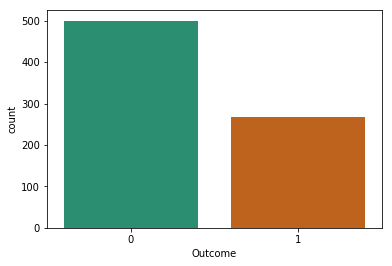

In [10]:
sns.countplot(x='Outcome',data=data, palette='Dark2')
plt.show()

In [11]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Replace zero values in BMI and Insulin columns with median values

In [13]:
bmi_median = data['BMI'].median()

In [14]:
data['BMI'].replace(0.0, bmi_median)

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
5      25.6
6      31.0
7      35.3
8      30.5
9      32.0
10     37.6
11     38.0
12     27.1
13     30.1
14     25.8
15     30.0
16     45.8
17     29.6
18     43.3
19     34.6
20     39.3
21     35.4
22     39.8
23     29.0
24     36.6
25     31.1
26     39.4
27     23.2
28     22.2
29     34.1
       ... 
738    36.6
739    39.5
740    42.3
741    30.8
742    28.5
743    32.7
744    40.6
745    30.0
746    49.3
747    46.3
748    36.4
749    24.3
750    31.2
751    39.0
752    26.0
753    43.3
754    32.4
755    36.5
756    32.0
757    36.3
758    37.5
759    35.5
760    28.4
761    44.0
762    22.5
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [18]:
Insulin_median = data['Insulin'].median()

In [19]:
data['Insulin'].replace(0, Insulin_median)

0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
5       30.5
6       88.0
7       30.5
8      543.0
9       30.5
10      30.5
11      30.5
12      30.5
13     846.0
14     175.0
15      30.5
16     230.0
17      30.5
18      83.0
19      96.0
20     235.0
21      30.5
22      30.5
23      30.5
24     146.0
25     115.0
26      30.5
27     140.0
28     110.0
29      30.5
       ...  
738    160.0
739     30.5
740    150.0
741     94.0
742    116.0
743     30.5
744    140.0
745    105.0
746     30.5
747     57.0
748    200.0
749     30.5
750     30.5
751     74.0
752     30.5
753    510.0
754     30.5
755    110.0
756     30.5
757     30.5
758     30.5
759     30.5
760     16.0
761     30.5
762     30.5
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

### Correlation between variables

In [20]:
corr = data.corr()

In [21]:
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

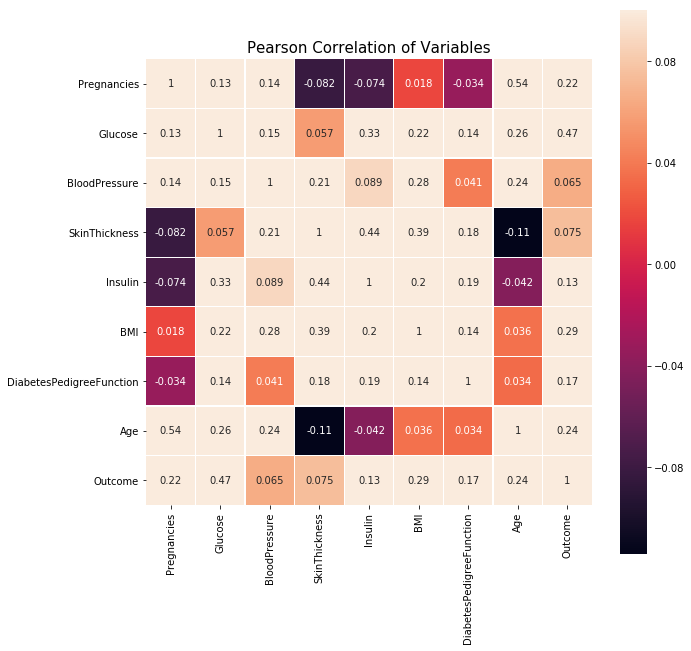

In [22]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Variables',y=1, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=0.1,square=True,linecolor='white',annot=True)

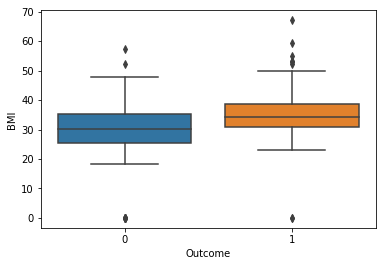

In [23]:
sns.boxplot(data.Outcome,data.BMI)

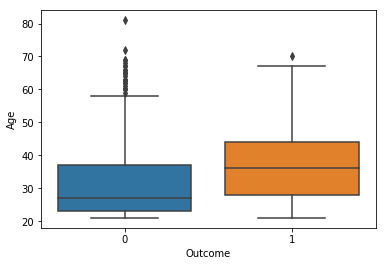

In [24]:
sns.boxplot(data.Outcome,data.Age)

### Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc_X = StandardScaler()

In [33]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Implement the Kernel SVM algorithm

In [34]:
from sklearn.svm import SVC

In [35]:
svc_model = SVC(kernel='rbf',random_state =0)

In [36]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred = svc_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,y_pred))

[[117  13]
 [ 30  32]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

   micro avg       0.78      0.78      0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192



In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [46]:
#Calculate AUC Score
auc = roc_auc_score(y_test,y_pred) 

In [48]:
print('AUC: %.3f' % auc)

AUC: 0.708


In [49]:
#Calculate ROC Curve
fpr , tpr , thresholds = roc_curve(y_test,y_pred)

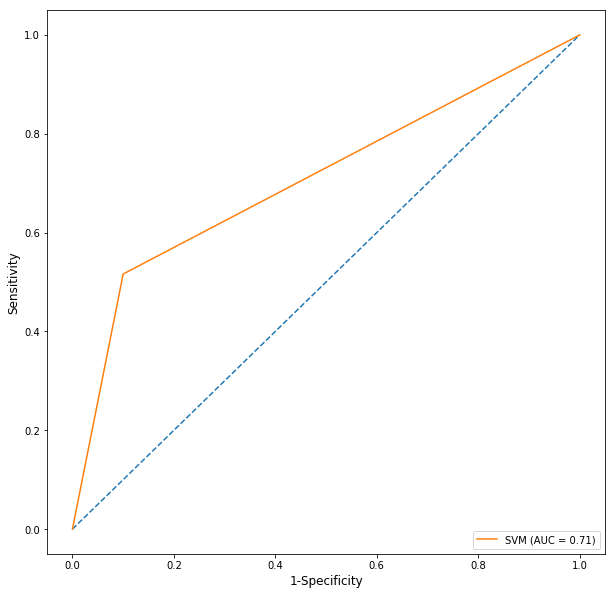

In [63]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [67]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [68]:
grid_predictions = grid.predict(X_test)

In [69]:
print(confusion_matrix(y_test,grid_predictions))

[[118  12]
 [ 27  35]]


In [70]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.56      0.64        62

   micro avg       0.80      0.80      0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [71]:
#Calculate AUC Score after GridSearchCV
auc_grid = roc_auc_score(y_test,grid_predictions)
print('AUC: %.3f' % auc_grid)

AUC: 0.736


In [72]:
#Calculate ROC Curve after Grid Search CV
fpr , tpr , thresholds = roc_curve(y_test,grid_predictions)

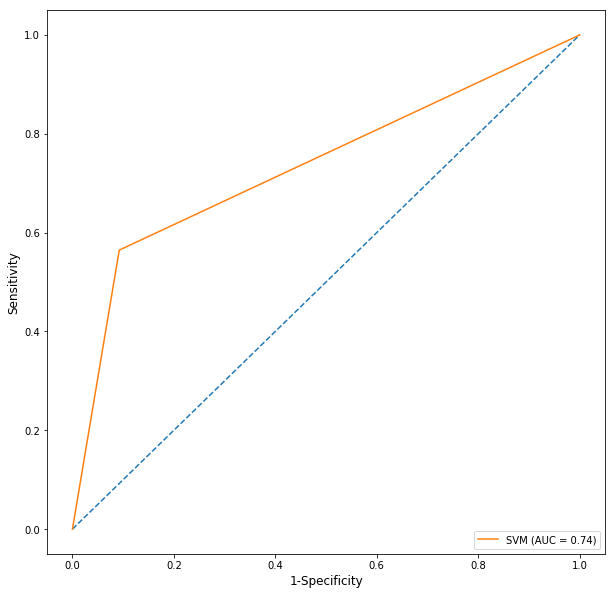

In [73]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='SVM (AUC = %0.2f)'% auc_grid)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()